# IDEAS

## Measurements

### *independent variables*

- BRAKE
- THROTTLE
- GEAR
- STEERING

> Directly controlled by driver

### *response variables*

- ENGINE_RPM
- SPEED
- [X/Y]POS
- DIST_FROM_[L/R]
- DIST_APEX_[1/2]
- ANGLE_APEX_[1/2]

> Affected by previous independent variables and other unkown factores
 
### *result variables*

- INVALID_LAP
- CURR_LAPTIME

> The result of previous factors and other unkown factors or an indicator

### *target variable*

- SECTION_TIME_MS

> The final result we care about.

## Laws of Physic

Formula One Racing follow the laws of physic.  
A system's final state is decided by its initial state and all the external effects which applies to it.


## Segments

There are 8 segments:

1. Segment #0: from **the start point** to 360
2. Segment #1: from 360 to 387
3. Segment #2: from 387 to 414
4. Segment #3: from 414 to 441
5. Segment #4: from 441 to 468
6. Segment #5: from 468 to 495
7. Segment #6: from 495 to 522
8. Segment #7: from 522 to **the end**

$$ SECTION\_TIME\_MS = \sum_{i=1}^{N} SEG\_TIME_i $$
$$ SEG\_TIME_i = CURR\_LAPTIME[i] - CURR\_LAPTIME[i-1] $$

## information transform

|independent variables →|response variables →|result variables →|target variable|
|---|---|---|---|
|BRAKE|ENGINE_RPM|CURR_LAPTIME|SECTION_TIME_MS|
|THROTTLE|SPEED|CURR_LAPTIME||
|GEAR|POS|||
|STEERING|DIST_FROM|||
|***other factors***|DIST_APEX||
||ANGLE_APEX||
||***other factors***||

## model #1

We assume that the result of all the known moments' measurements is the CURR_LAPTIME.  
So the **key factor** of the **SECTION_TIME_MS** is **522_CURR_LAPTIME**  
**final state = F(initial state, external factors)**

## model #2

There is **a best track** to reach the top performance.  
**DIST_FROM_[LEFT/RIGHT]** can discribe the track.


# Useful Code

## External Data

```
df = pd.read_csv('data.csv', index_col='SESSION_IDENTIFIER')
df = pd.read_csv('data.csv')
```

## DataFrame Options

```
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 20)
```

## DataFrame Info

```
df
df.head()
df.tail()
df.info()
df.columns
```

## DataFrame Columns & Rows & Details (Read)

```
df['SESSION_IDENTIFIER']
df[filter]

df.iloc[0]
df.iloc[0, 0]

df.loc[0, ['SESSION_IDENTIFIER', 'SECTION_TIME_MS']]
df.loc[[0,1,2], ['SESSION_IDENTIFIER', 'SECTION_TIME_MS']]
df.loc[0:10, ['SESSION_IDENTIFIER', 'SECTION_TIME_MS']]

df.loc[filter, 'SECTION_TIME_MS'].describe()
```

## DataFrame Index

```
df.index
df.set_index('xxxxxx', inplace=True)
df.reset_index(inplace=True)
df.sort_index()
df.sort_index(ascending=False)
```

## DataFrame Columns & Rows & Details (Update)

```
df.rename(column={'origional', 'new'}, inplace=True)

df.columns = [x.upper() for x in df.columns]
df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.replace(' ', '_')

df.loc[2] = [ '...', '...', '...', ... ]
df.loc[2, ['col1', 'col2']] = [ 'col1 new value', 'col2 new value' ]
df.loc[2, 'col1'] = 'col new value'
df.at[2, 'col1'] = 'col new value'
df.loc[filter_xxx, 'col'] = 'col new value'

df['col] = df['col'].str.lower()
df.drop(columns=['...'])

# apply, map, applymap, replace

# (df['...'].isin([ ... ])
# (df['...'].str.contains('...', na=False)
```

## Group

```
df_research_level_grp.get_group(('SENIOR',))
df_research_track_grp.get_group(('ON',))
```

## Other

https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# excel format file with correct string type for 'SESSION_IDENTIFIER'

df = pd.read_excel('data.xlsx', dtype={'SESSION_IDENTIFIER': 'string'})

In [5]:
# global variables

key_moments_prefix = [ "FB", "MB", "FS", "MS", "FT", "MT" ]
fix_moments_prefix = list( map(str, [ *range(360, 523, 27) ]) )
measurements = [
    "DIST_FROM_LEFT", "DIST_FROM_RIGHT",
    "XPOS", "YPOS",
    "SPEED", "LAP_DIST", 
    "CURR_LAPTIME",
    "THROTTLE", "BRAKE", "STEERING", "GEAR", "ENGINE_RPM",
    "DIST_APEX_1", "DIST_APEX_2", "ANGLE_APEX_1", "ANGLE_APEX_2"
]

segments_prefix = "SEG_TIME"
deltas_prefix = "DELTA_FROM_BEST"

target = 'SECTION_TIME_MS'

In [6]:
df.shape

(923, 225)

In [7]:
df['INVALID_LAP'].value_counts()

INVALID_LAP
1    593
0    330
Name: count, dtype: int64

In [8]:
df[['SESSION_IDENTIFIER', target]]

,SESSION_IDENTIFIER,SECTION_TIME_MS
0,58920418572522000,10859
1,58920418572522000,11061
2,177302089238231008,33453
3,177302089238231008,15359
4,180726787481596992,10913
...,...,...
918,21316631306D4FCCE0631218000A64C5,11537
919,21316631306D4FCCE0631218000A64C5,11812
920,2131C72B6DF61371E0631218000ACBAE,16514
921,2131C72B6DF61371E0631218000ACBAE,13651


In [9]:
df[target].describe()

count      923.000000
mean     13852.460455
std       6690.874607
min      10235.000000
25%      11052.500000
50%      11700.000000
75%      13699.500000
max      81713.000000
Name: SECTION_TIME_MS, dtype: float64

In [10]:
# .mean(), .median()

min = df[target].min()
max = df[target].max()

q1 = df[target].quantile(0.25)
q3 = df[target].quantile(0.75)
irq = q3 - q1
irq15 = irq * 1.5
boundary_min = ( 0 if q1 - irq15 < 0 else ( min if q1 - irq15 < min else q1 - irq15 )  )
boundary_max = ( max if q3 + irq15 > max else q3 + irq15 )
(min, max, q1, q3, irq, irq15, boundary_min, boundary_max)

(10235, 81713, 11052.5, 13699.5, 2647.0, 3970.5, 10235, 17670.0)

<Axes: xlabel='SECTION_TIME_MS'>

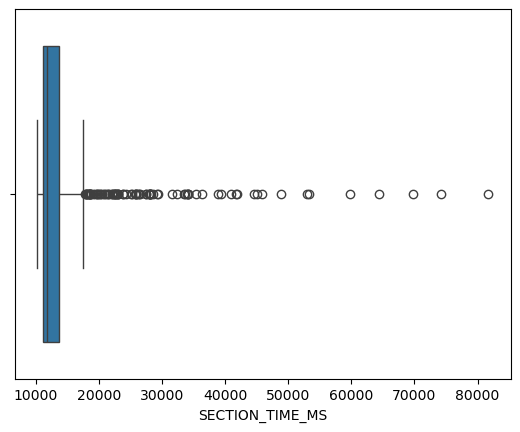

In [11]:
sns.boxplot(x=df[target], legend='full')

> *the tail is too long to accept for the following research*

In [13]:
filter_boundary = (df[target] < boundary_max)
filter_timestamp_1 = ( (df['387_CURR_LAPTIME'] - df['360_CURR_LAPTIME']) > 100 )
filter_timestamp_2 = ( (df['414_CURR_LAPTIME'] - df['387_CURR_LAPTIME']) > 100 )
filter_timestamp_3 = ( (df['441_CURR_LAPTIME'] - df['414_CURR_LAPTIME']) > 100 )
filter_timestamp_4 = ( (df['468_CURR_LAPTIME'] - df['441_CURR_LAPTIME']) > 100 )
filter_timestamp_5 = ( (df['495_CURR_LAPTIME'] - df['468_CURR_LAPTIME']) > 100 )
filter_timestamp_6 = ( (df['522_CURR_LAPTIME'] - df['495_CURR_LAPTIME']) > 100 )
filter_timestamp = filter_timestamp_1 & filter_timestamp_2 & filter_timestamp_3 & filter_timestamp_4 & filter_timestamp_5 & filter_timestamp_6
filter_acceptable = filter_boundary & filter_timestamp

In [14]:
filter_boundary.value_counts()

SECTION_TIME_MS
True     835
False     88
Name: count, dtype: int64

In [15]:
filter_timestamp.value_counts()

True     917
False      6
Name: count, dtype: int64

In [16]:
filter_acceptable.value_counts()

True     833
False     90
Name: count, dtype: int64

In [17]:
# data clean
df_acceptable = pd.DataFrame(df.loc[filter_acceptable])
df_acceptable.sort_values(by=target, ascending = True, inplace=True)
df_acceptable.reset_index(inplace=True)
df_acceptable.drop(columns=['index'], inplace=True)

In [18]:
df_acceptable.shape

(833, 225)

In [19]:
df_acceptable[target].describe()

count      833.000000
mean     12199.466987
std       1661.802562
min      10235.000000
25%      11007.000000
50%      11534.000000
75%      12852.000000
max      17504.000000
Name: SECTION_TIME_MS, dtype: float64

In [20]:
min = df_acceptable[target].min()
max = df_acceptable[target].max()

q1 = df_acceptable[target].quantile(0.25)
q3 = df_acceptable[target].quantile(0.75)
irq = q3 - q1
irq15 = irq * 1.5
boundary_min = ( 0 if q1 - irq15 < 0 else ( min if q1 - irq15 < min else q1 - irq15 )  )
boundary_max = ( max if q3 + irq15 > max else q3 + irq15 )
(min, max, q1, q3, irq, irq15, boundary_min, boundary_max)

(10235, 17504, 11007.0, 12852.0, 1845.0, 2767.5, 10235, 15619.5)

<Axes: xlabel='SECTION_TIME_MS'>

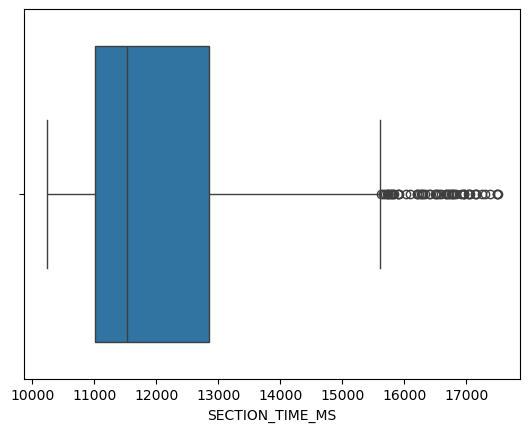

In [21]:
sns.boxplot(x=df_acceptable[target], legend='full')

In [22]:
filter_slow_max = (df_acceptable[target] >= boundary_max)
filter_slow_max.value_counts()

SECTION_TIME_MS
False    778
True      55
Name: count, dtype: int64

In [23]:
filter_fast_q1 = (df_acceptable[target] <= q1)
filter_fast_q1.value_counts()

SECTION_TIME_MS
False    623
True     210
Name: count, dtype: int64

> *for the tail is NOT so long, we would like to accept these data first*

In [25]:
df_research = pd.DataFrame(df_acceptable)

In [26]:
msmt = "CURR_LAPTIME"

for i in range(len(fix_moments_prefix) - 1):
    df_research[f'{segments_prefix}_{i+1}'] = df_research[f'{fix_moments_prefix[i+1]}_CURR_LAPTIME'] - df_research[f'{fix_moments_prefix[i]}_CURR_LAPTIME']

df_research[f'{segments_prefix}_{len(fix_moments_prefix)}'] = df_research[target] - df_research[f'{fix_moments_prefix[-1]}_CURR_LAPTIME']
df_research[f'{segments_prefix}_0'] = df_research[f'{fix_moments_prefix[0]}_CURR_LAPTIME']

for i in range(len(fix_moments_prefix)):
    df_research[f'{fix_moments_prefix[i]}_DIST_SUM'] = df_research[f'{fix_moments_prefix[i]}_DIST_FROM_LEFT'] + df_research[f'{fix_moments_prefix[i]}_DIST_FROM_RIGHT']


In [27]:
df_research['LEVEL'] = np.where(df_research[target] <= q1, 'SENIOR', 'JUNIOR')
df_research['TRACK'] = np.where(df_research['INVALID_LAP'], 'OFF', 'ON')

In [28]:
df_research[['360_CURR_LAPTIME', '522_CURR_LAPTIME', target]]

,360_CURR_LAPTIME,522_CURR_LAPTIME,SECTION_TIME_MS
0,4324,6932,10235
1,4387,7290,10446
2,4429,7263,10462
3,4506,7240,10471
4,4421,7073,10512
...,...,...,...
828,7607,11811,17294
829,5422,10527,17379
830,9876,13763,17486
831,7073,12229,17500


In [29]:
df_research.loc[0:5, 'SEG_TIME_1':]

,SEG_TIME_1,SEG_TIME_2,SEG_TIME_3,SEG_TIME_4,SEG_TIME_5,SEG_TIME_6,SEG_TIME_7,SEG_TIME_0,360_DIST_SUM,387_DIST_SUM,414_DIST_SUM,441_DIST_SUM,468_DIST_SUM,495_DIST_SUM,522_DIST_SUM,LEVEL,TRACK
0,320,410,537,465,439,437,3303,4324,16.643880,30.341314,14.498242,13.006576,12.750782,12.631037,12.680325,SENIOR,OFF
1,501,550,501,450,451,450,3156,4387,16.610556,16.899090,14.425730,13.010768,12.747348,12.644422,12.682333,SENIOR,ON
2,480,520,510,460,438,426,3199,4429,16.640166,16.825739,14.487609,13.006618,12.750757,12.631153,12.680453,SENIOR,ON
3,474,485,475,441,430,429,3231,4506,16.561956,16.816573,14.487165,13.006645,12.761383,12.631049,12.627018,SENIOR,ON
4,250,400,601,500,451,450,3439,4421,29.621210,43.000652,19.921745,12.995578,13.662346,14.163587,12.680363,SENIOR,OFF
5,473,511,499,448,433,427,3262,4464,16.639986,16.812267,14.488853,13.272214,12.750750,12.631198,12.680427,SENIOR,OFF


In [30]:
df_research_track_grp = df_research.groupby(['TRACK'])
df_research_level_grp = df_research.groupby(['LEVEL'])

In [31]:
display(df_research_track_grp[target].describe())
display(df_research_level_grp[target].describe())

,count,mean,std,min,25%,50%,75%,max
TRACK,,,,,,,,
OFF,509.0,12566.088409,1749.715301,10235.0,11259.0,11914.0,13574.0,17504.0
ON,324.0,11623.509259,1324.340113,10446.0,10865.5,11134.5,11780.0,17486.0


,count,mean,std,min,25%,50%,75%,max
LEVEL,,,,,,,,
JUNIOR,623.0,12675.428571,1669.345195,11008.0,11395.0,12036.0,13549.00,17504.0
SENIOR,210.0,10787.447619,146.302105,10235.0,10677.5,10806.5,10904.75,11007.0


In [32]:
# for mmt in fix_moments_prefix:
#     sns.boxplot(data=df_research, x=f'{mmt}_DIST_SUM', y='TRACK')
#     plt.show()

In [33]:
filter_on_track = (df_research['INVALID_LAP'] == False)
filter_senior = (df_research['LEVEL'] == 'SENIOR')

for msmt in ['DIST_SUM', 'DIST_FROM_LEFT', 'DIST_FROM_RIGHT']:
    print('\n')
    print(f'{msmt}')
    for mmt in fix_moments_prefix:
        filter = filter_on_track
        if (msmt != 'DIST_SUM'):
            filter = filter_on_track & filter_senior
        display(df_research.loc[filter, f'{mmt}_{msmt}'].mean())

# global function and variables

def dist_percent_from_center (dist_from_left, width):
    half = width / 2
    return 100 * (dist_from_left - half) / half

print('\n')
track_width = {}
for mmt in fix_moments_prefix:
    track_width[mmt] = df_research.loc[filter_on_track, f'{mmt}_DIST_SUM'].mean()
print(track_width)

print('\n')
best_dist_from_center = {}
for mmt in fix_moments_prefix:
    best_dist_from_center[mmt] = dist_percent_from_center(df_research.loc[filter_on_track & filter_senior, f'{mmt}_DIST_FROM_LEFT'].median(), track_width[mmt])
print(best_dist_from_center)




DIST_SUM


16.637782576909352

16.80367110007584

14.494916381930556

13.01385286182118

12.755272026648159

12.6337637543046

12.680321919970522



DIST_FROM_LEFT


7.110532056382904

15.130690301105732

4.079609974473154

1.0278175639963374

1.5553768363773353

2.602719581642731

3.723048563830076



DIST_FROM_RIGHT


9.527078225846893

1.670853013753479

10.414974935383045

11.991685337427993

11.199808079071103

10.029216988572696

8.956914767964227



{'360': 16.637782576909352, '387': 16.80367110007584, '414': 14.494916381930556, '441': 13.01385286182118, '468': 12.755272026648159, '495': 12.6337637543046, '522': 12.680321919970522}


{'360': -13.804491939907901, '387': 79.91824263753503, '414': -43.94381167121362, '441': -85.63352223657266, '468': -77.75615007987392, '495': -62.50645270545863, '522': -42.5649301889584}


In [34]:
for mmt in fix_moments_prefix:
    df_research[f'{mmt}_{deltas_prefix}'] = df_research[f'{mmt}_DIST_FROM_LEFT'].apply( lambda x: abs(
        dist_percent_from_center(x, track_width[mmt]) - best_dist_from_center[mmt]
    ))

df_research.loc[0:5, f'{fix_moments_prefix[0]}_{deltas_prefix}':]


,360_DELTA_FROM_BEST,387_DELTA_FROM_BEST,414_DELTA_FROM_BEST,441_DELTA_FROM_BEST,468_DELTA_FROM_BEST,495_DELTA_FROM_BEST,522_DELTA_FROM_BEST
0,97.555749,97.207449,87.234795,30.057788,17.538359,21.216450,34.805371
1,0.000000,7.263288,10.529337,12.756620,3.353596,0.438423,0.775393
2,6.446795,11.929943,3.659409,13.498864,5.159934,1.257969,3.703907
3,8.136798,3.260958,7.758804,11.948432,8.009171,17.519228,16.184519
4,191.687383,176.348640,180.647977,31.598822,15.098567,25.297260,44.728352
5,1.933719,6.789916,6.676440,12.325955,11.608488,5.202424,9.425180


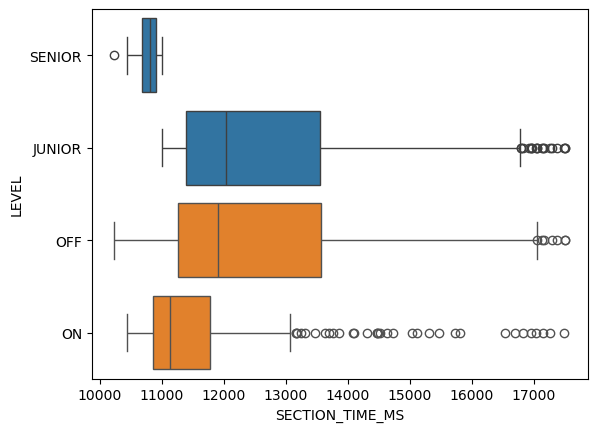

In [35]:
groups = ["LEVEL", "TRACK"]
for grp in groups:
    sns.boxplot(data=df_research, x=target, y=grp)

> *on/off track is highly coorelated with senior/junior level*  
> *among on track dirvers, some are junior (on track and slow)*

In [37]:
# moments = key_moments_prefix + fix_moments_prefix

# for msmt in ['GEAR', 'ANGLE_APEX_1', 'ANGLE_APEX_2', 'THROTTLE']:
#     for mmt in moments:
#         sns.boxplot(data=df_research, x=f'{mmt}_{msmt}', y="LEVEL")
#         plt.show()


In [38]:
# moments = key_moments_prefix + fix_moments_prefix

# for mmt in moments:
#     for msmt in ['STEERING']:
#         sns.boxplot(data=df_research, x=f'{mmt}_{msmt}', y="LEVEL")
#         plt.show()

In [39]:
# moments = fix_moments_prefix

# for mmt in moments:
#     sns.boxplot(data=df_research, x=f'{mmt}_CURR_LAPTIME', y="LEVEL")
#     plt.show()

# @@@@@@@@@@
# "CURR_LAPTIME"  should be divide into several segments


In [40]:
# moments = key_moments_prefix + fix_moments_prefix

# for mmt in moments:
#     for msmt in measurements:
#         sns.boxplot(data=df_research, x=f'{mmt}_{msmt}', y="LEVEL")
#         plt.show()

# @@@@@@@@@@@@@@
# data should be cleaned based on some measurements (heavy outliers)


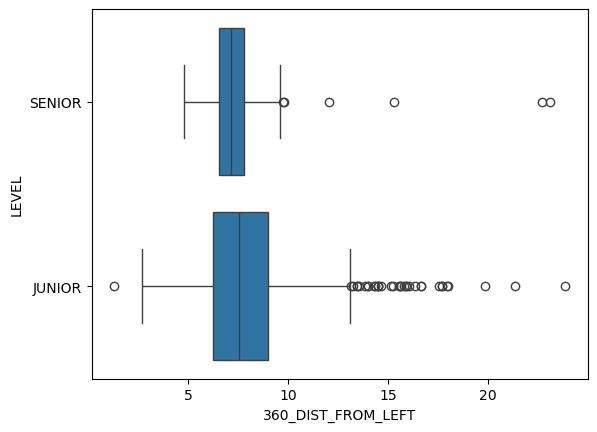

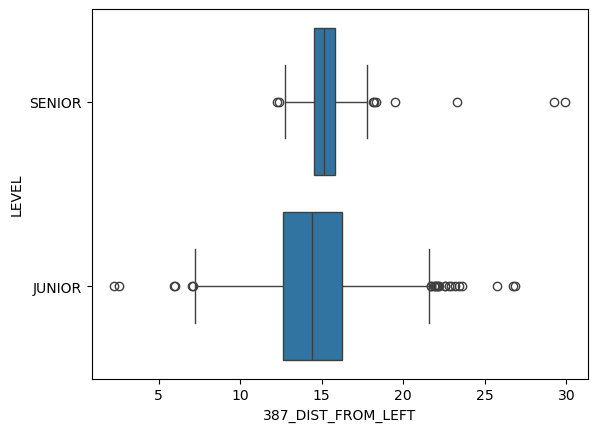

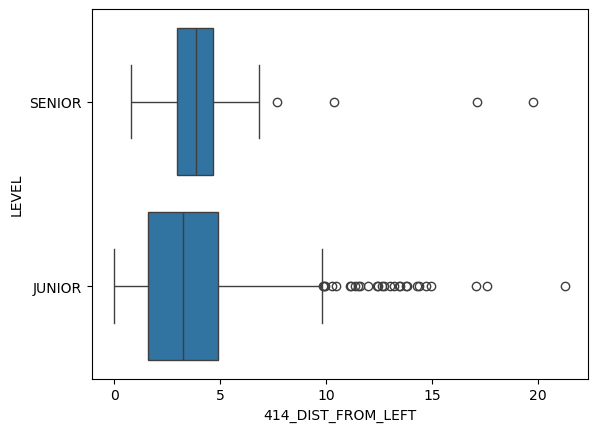

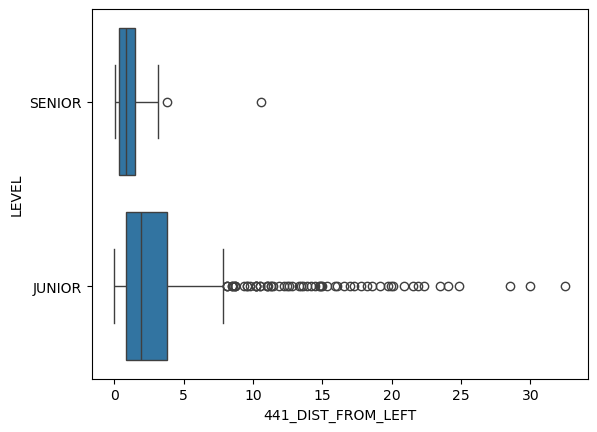

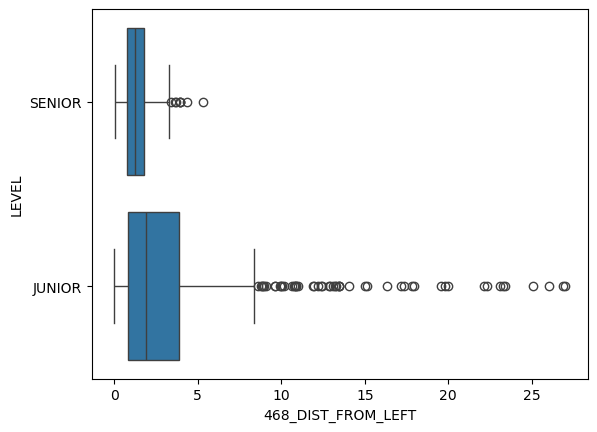

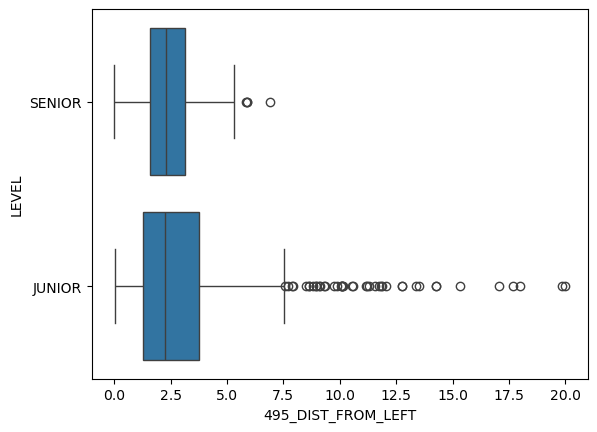

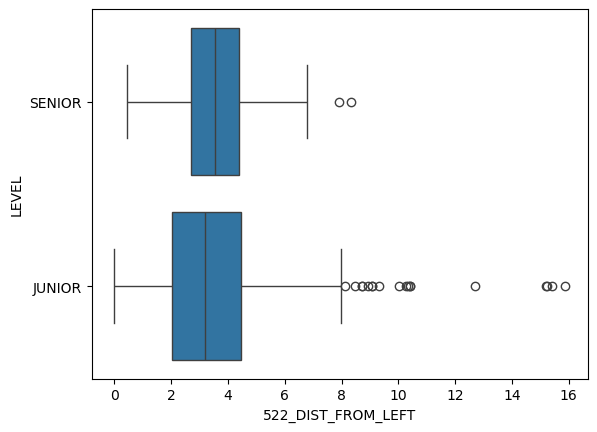

In [41]:
moments = fix_moments_prefix

for mmt in moments:
    for msmt in ['DIST_FROM_LEFT']:
        sns.boxplot(data=df_research, x=f'{mmt}_{msmt}', y="LEVEL")
        plt.show()

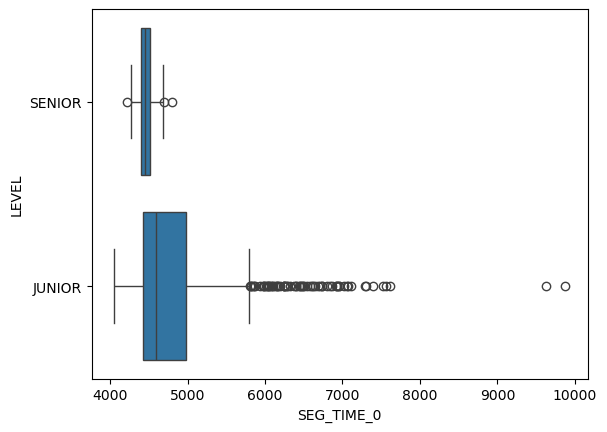

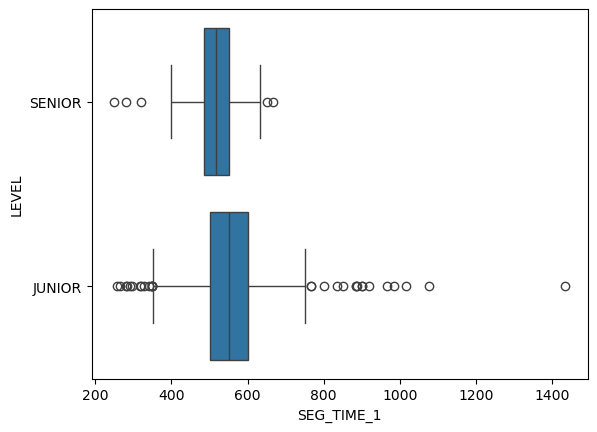

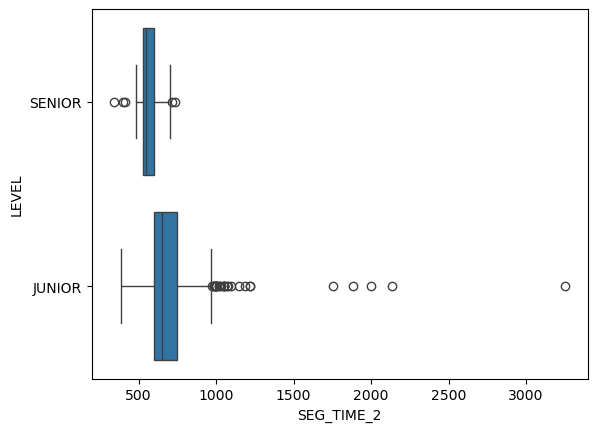

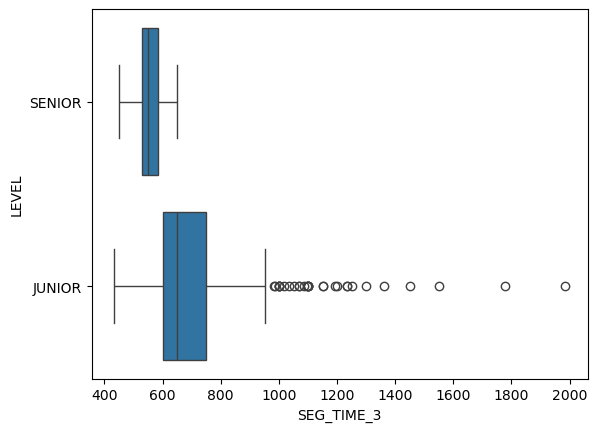

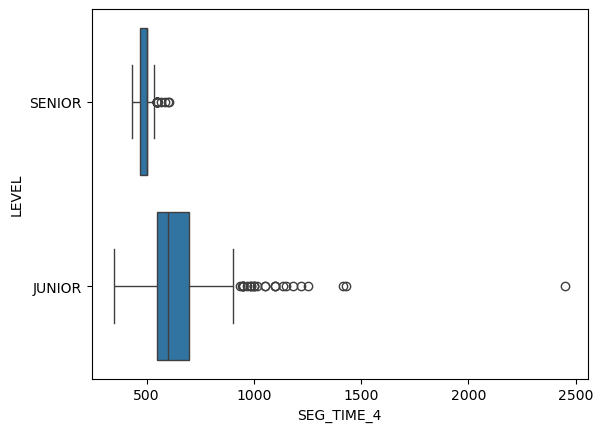

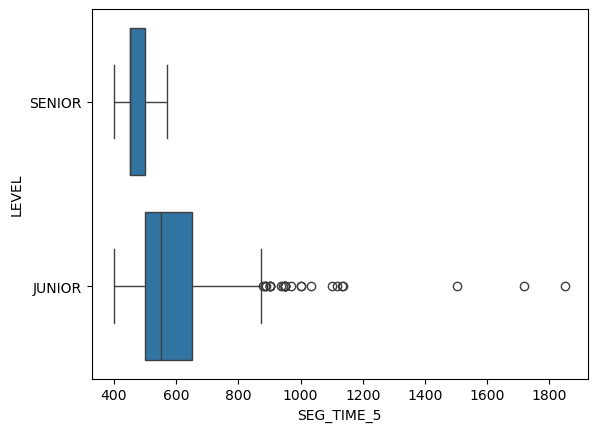

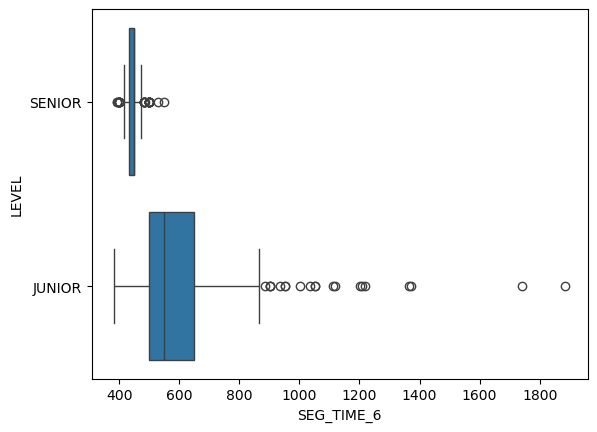

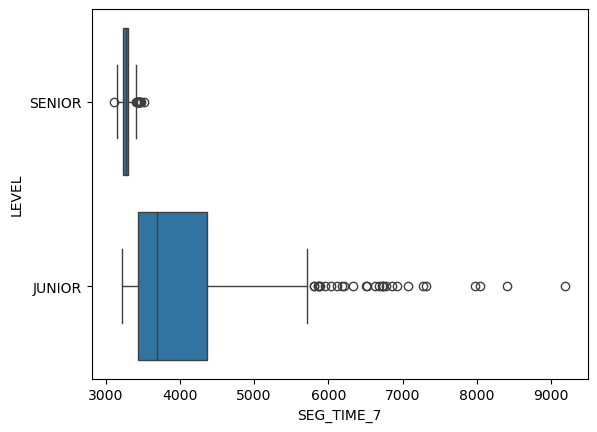

In [42]:
for i in range(1 + len(fix_moments_prefix)):
    sns.boxplot(data=df_research, x=f'{segments_prefix}_{i}', y="LEVEL")
    plt.show()


<Axes: xlabel='522_CURR_LAPTIME', ylabel='LEVEL'>

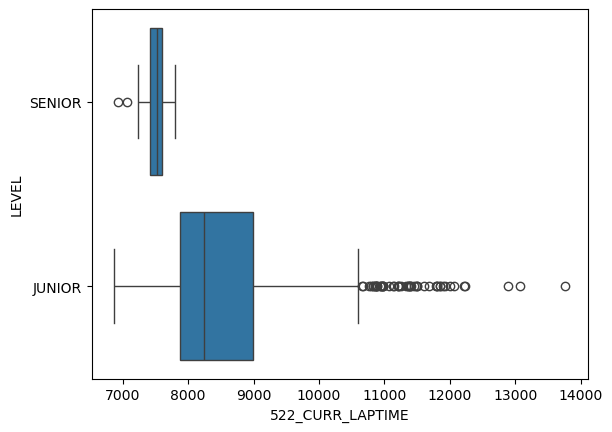

In [43]:
sns.boxplot(data=df_research, x="522_CURR_LAPTIME", y="LEVEL")

<Axes: xlabel='SECTION_TIME_MS', ylabel='LEVEL'>

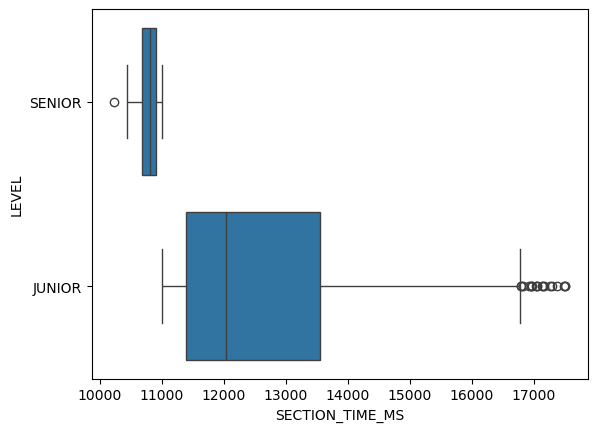

In [44]:
sns.boxplot(data=df_research, x=target, y="LEVEL")

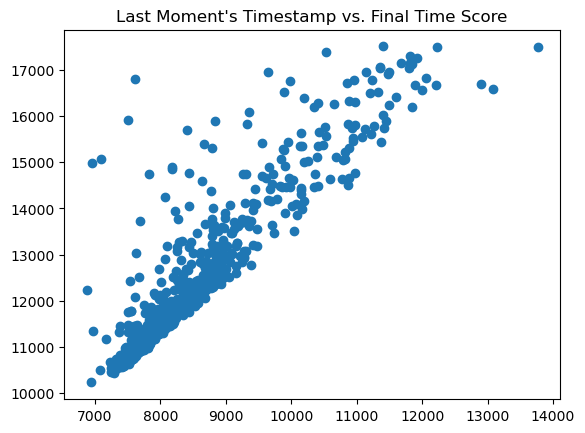

In [45]:
plt.scatter(df_research['522_CURR_LAPTIME'], df_research[target])
plt.title("Last Moment's Timestamp vs. Final Time Score")
# plt.xlabel('Timestamp')
# plt.ylabel('Time Score')
plt.show()

> 522_CURR_LAPTIME is corralated with SECTION_TIME_MS
> Some samples' relation is NOT reasonable at all

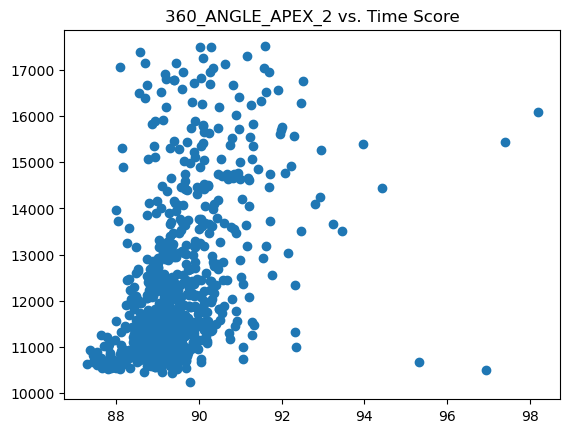

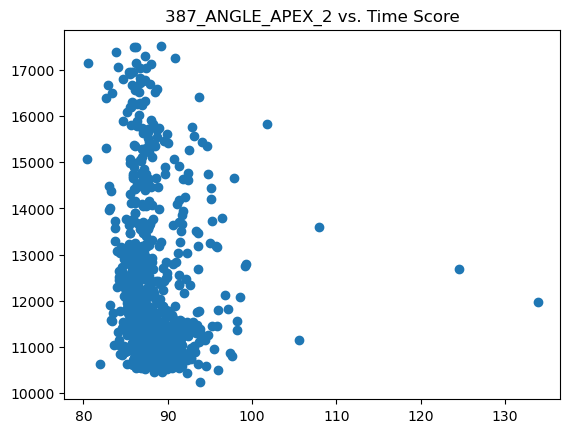

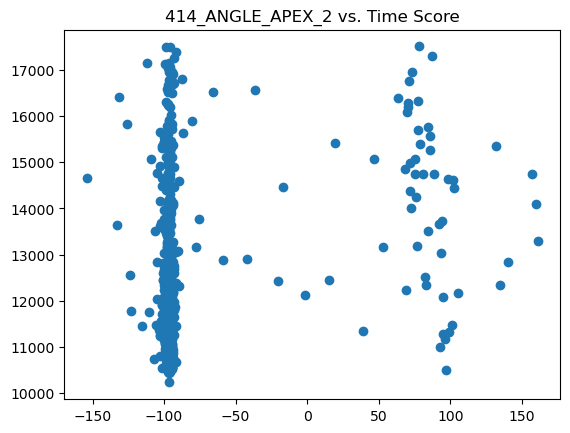

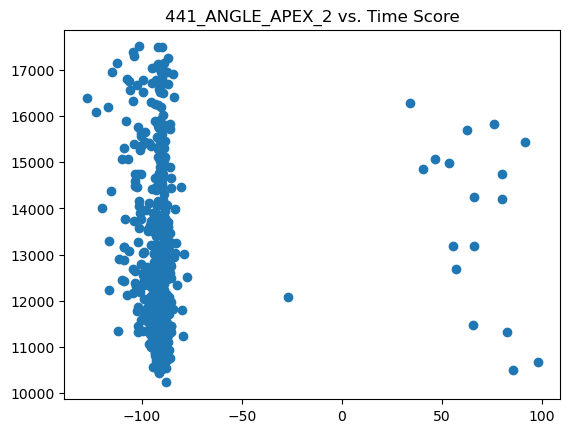

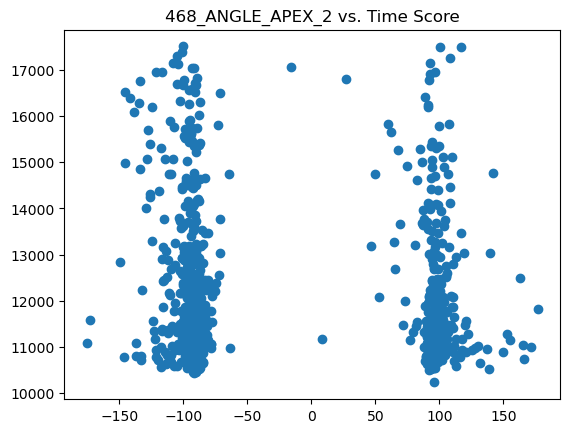

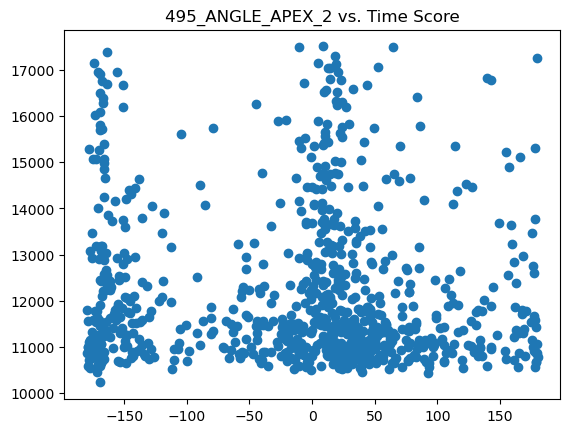

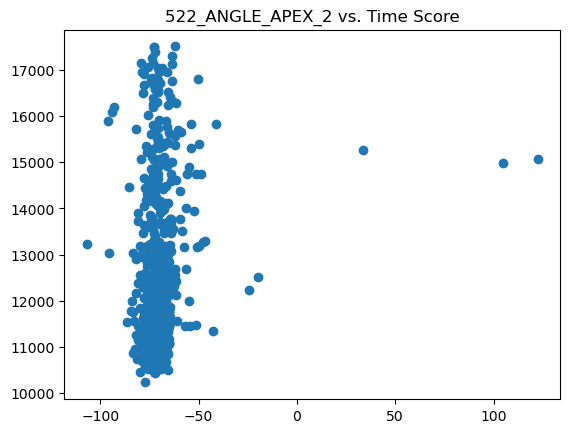

In [47]:
msmt = measurements[15]  # total 16
for mmt in fix_moments_prefix:
    plt.scatter(df_research[f'{mmt}_{msmt}'], df_research[target])
    plt.title(f'{mmt}_{msmt} vs. Time Score')
    plt.show()

In [48]:
features_last_moment = [
    f'{fix_moments_prefix[-1]}_CURR_LAPTIME',
    f'{fix_moments_prefix[-1]}_SPEED',
    f'{fix_moments_prefix[-1]}_ANGLE_APEX_2',
    f'{fix_moments_prefix[-1]}_STEERING',
    f'{fix_moments_prefix[-1]}_DIST_FROM_LEFT',
    f'{fix_moments_prefix[-1]}_THROTTLE',
    f'{fix_moments_prefix[-1]}_BRAKE',
]
features_last_moment

['522_CURR_LAPTIME',
 '522_SPEED',
 '522_ANGLE_APEX_2',
 '522_STEERING',
 '522_DIST_FROM_LEFT',
 '522_THROTTLE',
 '522_BRAKE']

In [49]:
moments = list(fix_moments_prefix)
moments.reverse()

features_all_left  = list( map(lambda x: f'{x}_DIST_FROM_LEFT',  moments) )
features_all_right = list( map(lambda x: f'{x}_DIST_FROM_RIGHT', moments) )
features_all_delta = list( map(lambda x: f'{x}_DELTA_FROM_BEST', moments) )
features_all_speed = list( map(lambda x: f'{x}_SPEED', moments) )
features_last  = [
    f'522_ANGLE_APEX_2',
    f'522_STEERING',
]
# features = features_left + features_speed
# features = features_right + features_speed
features_best_track = features_all_delta + features_all_speed # + features_last
features_best_track

['522_DELTA_FROM_BEST',
 '495_DELTA_FROM_BEST',
 '468_DELTA_FROM_BEST',
 '441_DELTA_FROM_BEST',
 '414_DELTA_FROM_BEST',
 '387_DELTA_FROM_BEST',
 '360_DELTA_FROM_BEST',
 '522_SPEED',
 '495_SPEED',
 '468_SPEED',
 '441_SPEED',
 '414_SPEED',
 '387_SPEED',
 '360_SPEED']

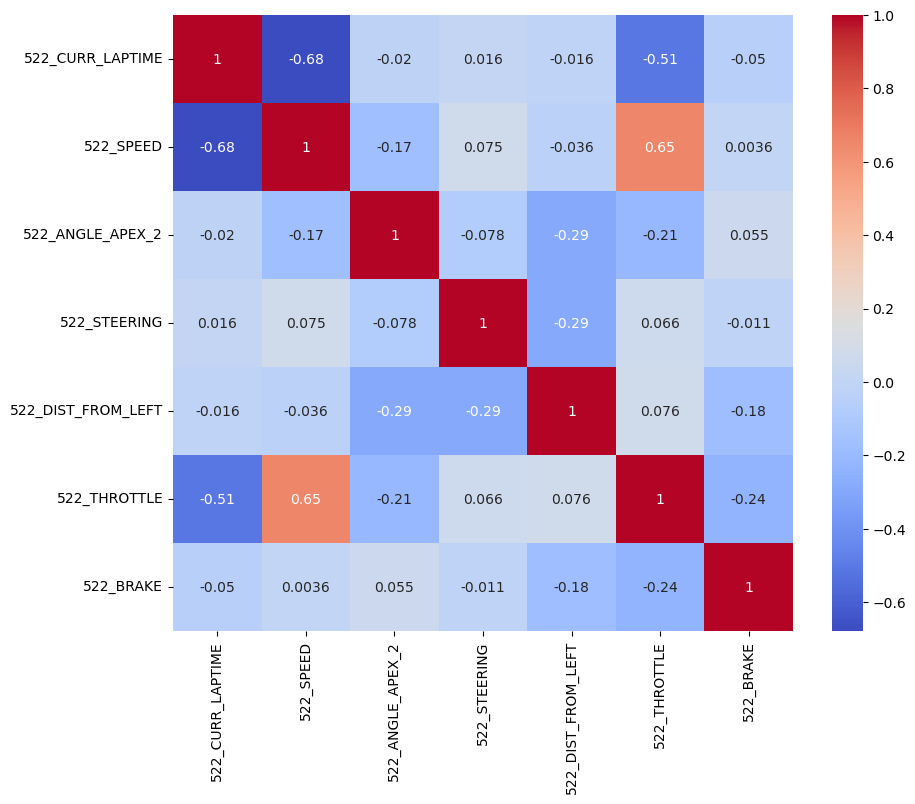

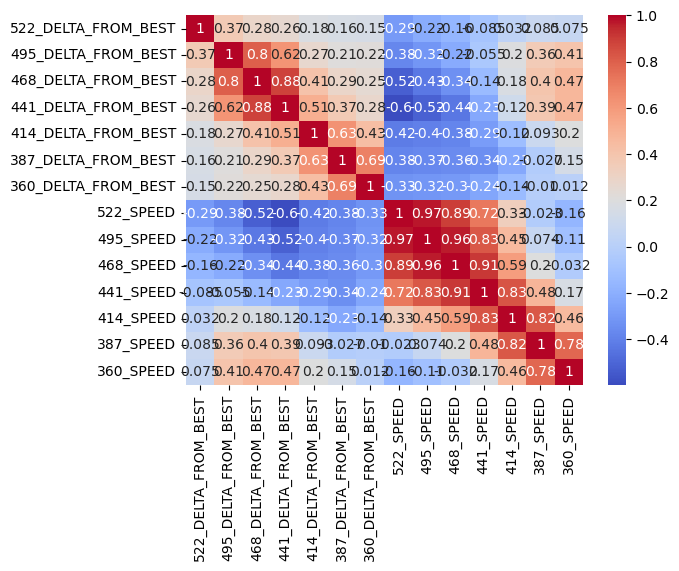

In [50]:
data = df_research

corr_matrix1 = data[features_last_moment].corr()
corr_matrix2 = data[features_best_track].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.show()

sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.show()

# plt.savefig('correlations1.png', bbox_inches='tight')


In [51]:
import statsmodels.api as sm

data = df_research

y = data[target]
X1 = data[features_last_moment]
X2 = data[features_best_track]

X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

print(model1.summary())
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:        SECTION_TIME_MS   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1826.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:06:34   Log-Likelihood:                -6191.3
No. Observations:                 833   AIC:                         1.240e+04
Df Residuals:                     825   BIC:                         1.244e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7572.1302    246

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
# model 1 & 2

from sklearn.linear_model import Ridge

data = df_research

for features in [features_last_moment, features_best_track]:
    
    print('\n')
    print(features)
    
    for i in range(1, len(features) + 1):

        # !!! here is the option: remark the following line to see details !!!
        if (i < len(features)):
            continue;
        
        print('\n')
        
        snapshot_features = features[0:i]
        
        X = data[snapshot_features]
        y = data[target]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = Ridge(alpha=1.0)
        model.fit(X_train, y_train)

        y_pred_ridge = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
        print(f"RMSE: {rmse:.2f}")
        
        df_importance = pd.DataFrame({
            'Feature': snapshot_features,
            'Coefficient': model.coef_
        }).sort_values(by='Coefficient', key=abs, ascending=False)
        
        print(df_importance)



['522_CURR_LAPTIME', '522_SPEED', '522_ANGLE_APEX_2', '522_STEERING', '522_DIST_FROM_LEFT', '522_THROTTLE', '522_BRAKE']


RMSE: 600.11
              Feature  Coefficient
5        522_THROTTLE  -551.736169
3        522_STEERING  -377.143720
6           522_BRAKE  -259.383516
4  522_DIST_FROM_LEFT    48.086268
1           522_SPEED   -14.838436
2    522_ANGLE_APEX_2    14.825436
0    522_CURR_LAPTIME     1.026441


['522_DELTA_FROM_BEST', '495_DELTA_FROM_BEST', '468_DELTA_FROM_BEST', '441_DELTA_FROM_BEST', '414_DELTA_FROM_BEST', '387_DELTA_FROM_BEST', '360_DELTA_FROM_BEST', '522_SPEED', '495_SPEED', '468_SPEED', '441_SPEED', '414_SPEED', '387_SPEED', '360_SPEED']


RMSE: 920.94
                Feature  Coefficient
7             522_SPEED   -52.197048
8             495_SPEED    25.310244
13            360_SPEED   -16.285958
9             468_SPEED   -11.567773
5   387_DELTA_FROM_BEST    -9.538611
6   360_DELTA_FROM_BEST     8.870518
11            414_SPEED    -4.308964
10            44

In [54]:
# model Gradient

from sklearn.ensemble import GradientBoostingRegressor

data = df_research

for features in [list(features_last_moment[0:7]), features_best_track]:
    print('\n')
    
    X = data[features]
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = GradientBoostingRegressor(
        loss="squared_error", # "quantile",
        n_estimators=100,
        max_depth=1,
        alpha=0.95,
        subsample = 1, 
        learning_rate=0.1,
        # min_samples_split = 2, 
        # min_samples_leaf = 1, 
        # random_state = None, 
        # max_features = None, 
        # verbose = 0, 
        # max_leaf_nodes = None, 
        # init = None, 
        # warm_start = False,
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'MSE: {mse:.2f}')
    
    df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    df_importance = df_importance.sort_values(by='Importance', ascending=False)
    print(df_importance)



MSE: 643.92
              Feature  Importance
0    522_CURR_LAPTIME    0.730624
1           522_SPEED    0.244646
5        522_THROTTLE    0.015934
2    522_ANGLE_APEX_2    0.006584
3        522_STEERING    0.002211
4  522_DIST_FROM_LEFT    0.000000
6           522_BRAKE    0.000000


MSE: 900.53
                Feature  Importance
7             522_SPEED    0.562829
9             468_SPEED    0.183762
8             495_SPEED    0.104184
13            360_SPEED    0.061629
12            387_SPEED    0.031337
10            441_SPEED    0.029350
11            414_SPEED    0.017451
6   360_DELTA_FROM_BEST    0.008412
2   468_DELTA_FROM_BEST    0.001046
0   522_DELTA_FROM_BEST    0.000000
1   495_DELTA_FROM_BEST    0.000000
3   441_DELTA_FROM_BEST    0.000000
4   414_DELTA_FROM_BEST    0.000000
5   387_DELTA_FROM_BEST    0.000000


In [55]:
# model KNeighbors

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

data = df_research

# for KNeighbors model heavily depends on distance calculation
# the data should be scaled
scaler = MinMaxScaler
# scaler = StandardScaler

n = 6
a = 'auto' # 'auto', 'ball_tree', 'kd_tree', 'brute'

for features in [list(features_last_moment[0:7]), features_best_track]:
    print('\n')
    
    y = data[target]
    X = data[features]
    X = scaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = KNeighborsRegressor(n_neighbors=n, algorithm=a)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'MSE: {mse:.2f}')




MSE: 664.85


MSE: 901.29


In [56]:
from sklearn.neural_network import MLPRegressor

data = df_research

for features in [list(features_last_moment[0:7]), features_best_track]:
    print('\n')

    y = data[target]
    X = data[features]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # model = MLPRegressor(hidden_layer_sizes=(100, 100), activation="identity", shuffle=False, solver="lbfgs", alpha=0.001)
    model = MLPRegressor(
        hidden_layer_sizes=(10), activation='tanh', solver='lbfgs', max_iter=15000, tol=1, random_state=88888
        # hidden_layer_sizes=(10), activation="relu",
        # solver='adam', alpha=0.0001,
        # batch_size='auto', learning_rate="constant",
        # learning_rate_init=0.001,
        # power_t=0.5, max_iter=200,tol=1e-4
    )
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'MSE: {mse:.2f}')


# print(pre)
# print(ytest)
# print(model.coefs_)
# print(model.n_layers_)
# print(model.n_outputs_)
# print(model.score(xtest, ytest))



MSE: 1843.58


MSE: 1988.62
